<a href="https://colab.research.google.com/github/brigittee/stock-analysis-engine/blob/master/data_alpaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# load data from alpaca / polygon
!pip3 install alpaca-trade-api -q
import pandas as pd

     |████████████████████████████████| 81kB 5.3MB/s 
     |████████████████████████████████| 204kB 17.2MB/s 
     |████████████████████████████████| 1.2MB 15.2MB/s 
     |████████████████████████████████| 153kB 28.0MB/s 
     |████████████████████████████████| 256kB 33.5MB/s 


#Global parameters

In [4]:
# global parameters
API_KEY = 'AK9V2JGEUOIBRLPHYGQP'
SECRET_KEY = 'X35FNDJY4y0CDGvs7JF4dZ3pCGOYus6ChotHahVa'
symbol = 'AAPL'  # 'TSE:TD'
symbol = 'SPY'

# download data

In [ ]:
def intraday(symbol, from_date, to_date):
  # intraday data available from '2004-01-01'. Each reuqest has a limit of 5000 data points (~ 7 days of intraday data).
  api = tradeapi.REST(API_KEY, SECRET_KEY, api_version='v2') # or use ENV Vars shown below
  dat = api.polygon.historic_agg_v2(symbol, multiplier=1, timespan='minute', _from=from_date, to=to_date, unadjusted=False, limit=None).df.reset_index(level=0, inplace=False)
  return dat

  

#API

In [ ]:
https://api.alpaca.markets

In [5]:
import alpaca_trade_api as tradeapi

api = tradeapi.REST(API_KEY, SECRET_KEY, api_version='v2') # or use ENV Vars shown below
account = api.get_account()
api.list_positions()
account.status

'ACCOUNT_UPDATED'

In [41]:
from_date = '2004-01-01'   # '2020-06-20'
to_date = '2004-02-01'     # '2020-07-01'

In [42]:
dat = api.polygon.historic_agg_v2(symbol, multiplier=1, timespan='minute', _from=from_date, to=to_date, unadjusted=False, limit=None).df.reset_index(level=0, inplace=False)
dat # timestamp is NewYork timezone

,timestamp,open,high,low,close,volume
0,2004-01-02 08:00:00-05:00,111.85,111.85,111.85,111.85,800.0
1,2004-01-02 08:01:00-05:00,111.82,111.82,111.82,111.82,200.0
2,2004-01-02 08:03:00-05:00,111.83,111.83,111.83,111.83,200.0
3,2004-01-02 08:04:00-05:00,111.81,111.81,111.80,111.80,3300.0
4,2004-01-02 08:06:00-05:00,111.85,111.85,111.85,111.85,700.0
...,...,...,...,...,...,...
4995,2004-01-16 08:04:00-05:00,113.97,113.97,113.97,113.97,3000.0
4996,2004-01-16 08:15:00-05:00,113.96,113.96,113.96,113.96,3000.0
4997,2004-01-16 08:21:00-05:00,113.91,113.91,113.91,113.91,400.0
4998,2004-01-16 08:24:00-05:00,113.96,113.96,113.96,113.96,900.0


NameError: ignored

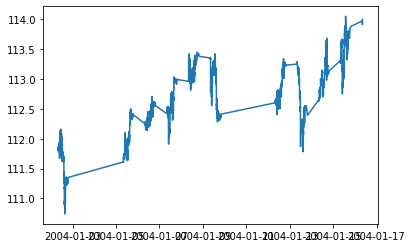

In [46]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(dat['timestamp'],dat['close'])
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
#plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
#plt.subplots_adjust(bottom=0.15)
plt.show()

In [43]:
np.unique(dat['timestamp'].dt.date)

array([datetime.date(2004, 1, 2), datetime.date(2004, 1, 5),
       datetime.date(2004, 1, 6), datetime.date(2004, 1, 7),
       datetime.date(2004, 1, 8), datetime.date(2004, 1, 9),
       datetime.date(2004, 1, 12), datetime.date(2004, 1, 13),
       datetime.date(2004, 1, 14), datetime.date(2004, 1, 15),
       datetime.date(2004, 1, 16)], dtype=object)

In [47]:
dat['timestamp']

0      2004-01-02 08:00:00-05:00
1      2004-01-02 08:01:00-05:00
2      2004-01-02 08:03:00-05:00
3      2004-01-02 08:04:00-05:00
4      2004-01-02 08:06:00-05:00
                  ...           
4995   2004-01-16 08:04:00-05:00
4996   2004-01-16 08:15:00-05:00
4997   2004-01-16 08:21:00-05:00
4998   2004-01-16 08:24:00-05:00
4999   2004-01-16 08:32:00-05:00
Name: timestamp, Length: 5000, dtype: datetime64[ns, America/New_York]

In [21]:
dat.shape

(5856, 6)

In [44]:
dat.shape

(5000, 6)